In [74]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
from numpy.linalg import inv

In [75]:
plt.style.use(['ggplot'])
data = pd.read_csv('data.txt')
data.columns = ["id", "long", "lati", "alti"]
data = data.drop('id',axis = 1);

In [76]:
x = data.drop('alti',axis = 1)
x = x[['lati','long']]
y = data['alti']
X = np.array(x)
y = np.array(y)

In [77]:
X = (X-np.mean(X, axis = 0))/np.std(X,axis = 0)
y = (y-np.mean(y))/np.std(y)

In [78]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures as pf

In [79]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size = 0.05)
X_test = np.concatenate([X_test,X_val], axis = 0)
y_test = np.concatenate([y_test, y_val])

In [80]:
poly = pf(degree=2, interaction_only=False, include_bias=True)
X_train_2 = poly.fit_transform(X_train)
X_test_2 = poly.fit_transform(X_test)
X_val_2 = poly.fit_transform(X_val)

In [81]:
poly = pf(degree=3, interaction_only=False, include_bias=True)
X_train_3 = poly.fit_transform(X_train)
X_test_3 = poly.fit_transform(X_test)
X_val_3 = poly.fit_transform(X_val)

In [82]:
poly = pf(degree=4, interaction_only=False, include_bias=True)
X_train_4 = poly.fit_transform(X_train)
X_test_4 = poly.fit_transform(X_test)
X_val_4 = poly.fit_transform(X_val)

In [83]:
poly = pf(degree=5, interaction_only=False, include_bias=True)
X_train_5 = poly.fit_transform(X_train)
X_test_5 = poly.fit_transform(X_test)
X_val_5 = poly.fit_transform(X_val)

In [84]:
poly = pf(degree=6, interaction_only=False, include_bias=True)
X_train_6 = poly.fit_transform(X_train)
X_test_6 = poly.fit_transform(X_test)
X_val_6 = poly.fit_transform(X_val)

In [85]:
#Function to calculate loss
def  lossfunc(x_,w_,y_):
    m = len(y_)
    return (0.5/m)*np.sum((w_.dot(x_.T)-y_)**2)

In [86]:
#Function to calculate Rsquared and RMS
def RSq_RMS(w,x,y):
    RSS =  pow(w.dot(x.T) - y,2).sum()
    TSS =  pow(y - y.mean(),2).sum()
    n = len(y)
    rs = 1 - (RSS/TSS)
    RMS = pow(RSS/n,0.5)
    return [rs,RMS]

In [120]:
# Gradient Descent - polynomial of degree 2

alpha =0.005
itns = 1000
counter = 0
losses_2 = []
stop_criterion = True
w = np.array([0,1,1,1,1,1])
print(w)
while(stop_criterion):
    y_hat = w.dot(X_train_2.T)
    loss_ = lossfunc(X_train_2,w,y_train)
    losses_2.append(loss_)
    if counter%20 == 0:
        print("iteration: {} loss : {}" .format(counter,loss_))
    w_der = (y_hat-y_train)*(X_train_2.T)
    w_der_norm = np.mean(w_der, axis = 1)
    w = w - alpha*w_der_norm
    if(counter > 100):
        if (abs((losses_2[counter] - losses_2[counter-1])/losses_2[counter]) < 0.00002):
            stop_criterion = False
    counter = counter+1
    
print(w)

[0 1 1 1 1 1]
iteration: 0 loss : 8.63704844459141
iteration: 20 loss : 4.208056092329959
iteration: 40 loss : 2.387360829006685
iteration: 60 loss : 1.5823928792612274
iteration: 80 loss : 1.189309147739154
iteration: 100 loss : 0.9741864954786608
iteration: 120 loss : 0.8430683722745386
iteration: 140 loss : 0.7560080542713203
iteration: 160 loss : 0.694599896027197
iteration: 180 loss : 0.649489058059575
iteration: 200 loss : 0.6154171006553067
iteration: 220 loss : 0.589159123757582
iteration: 240 loss : 0.5686027781786506
iteration: 260 loss : 0.5522992631126507
iteration: 280 loss : 0.5392227694907463
iteration: 300 loss : 0.528630099955438
iteration: 320 loss : 0.5199730793857119
iteration: 340 loss : 0.5128412495410353
iteration: 360 loss : 0.5069231459546572
iteration: 380 loss : 0.5019795354472948
iteration: 400 loss : 0.4978246041763988
iteration: 420 loss : 0.49431254725363966
iteration: 440 loss : 0.4913278865660305
iteration: 460 loss : 0.4887783946310407
iteration: 480 l

In [121]:
RSq_RMS(w,X_test_2,y_test)

[0.053261679601786072, 0.9757228534118132]

In [122]:
# Gradient Descent for testing

loss_gd_test = lossfunc(X_test_2, w, y_test)
print(loss_gd_test)

0.476017543335


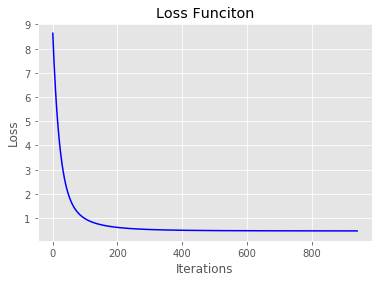

In [123]:
plt.plot(losses_2, 'b')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Loss Funciton')
plt.show()

In [124]:
# Gradient Descent - polynomial of degree 3

alpha =0.005
itns = 1000
counter = 0
losses_3 = []
stop_criterion = True
w = np.array([0,1,1,1,1,1,1,1,1,1])
print(w)
while(stop_criterion):
    y_hat = w.dot(X_train_3.T)
    loss_ = lossfunc(X_train_3,w,y_train)
    losses_3.append(loss_)
    if counter%20 == 0:
        print("iteration: {} loss : {}" .format(counter,loss_))
    w_der = (y_hat-y_train)*(X_train_3.T)
    w_der_norm = np.mean(w_der, axis = 1)
    w = w - alpha*w_der_norm
    if(counter > 100):
        if (abs((losses_3[counter] - losses_3[counter-1])/losses_3[counter]) < 0.00002):
            stop_criterion = False
    counter = counter+1
    
print(w)

[0 1 1 1 1 1 1 1 1 1]
iteration: 0 loss : 45.154179295596194
iteration: 20 loss : 4.985522531252451
iteration: 40 loss : 1.6243112173640046
iteration: 60 loss : 0.9648930783657699
iteration: 80 loss : 0.7488724007810661
iteration: 100 loss : 0.6514714203369698
iteration: 120 loss : 0.5972573043965993
iteration: 140 loss : 0.5631001843730311
iteration: 160 loss : 0.539869758849983
iteration: 180 loss : 0.5231706892150775
iteration: 200 loss : 0.5106178991360313
iteration: 220 loss : 0.5008270008746255
iteration: 240 loss : 0.49295741430107953
iteration: 260 loss : 0.4864785184286935
iteration: 280 loss : 0.48104220597514774
iteration: 300 loss : 0.4764110894552908
iteration: 320 loss : 0.47241712486236065
iteration: 340 loss : 0.4689372410050272
iteration: 360 loss : 0.46587862565487487
iteration: 380 loss : 0.4631695798150475
iteration: 400 loss : 0.4607536413138947
iteration: 420 loss : 0.45858567174318077
iteration: 440 loss : 0.45662915530083764
iteration: 460 loss : 0.4548542699961

In [125]:
RSq_RMS(w,X_test_3,y_test)

[0.13601122909368912, 0.93210652500486935]

In [126]:
# Gradient Descent for testing

loss_gd_test = lossfunc(X_test_3, w, y_test)
print(loss_gd_test)

0.434411286978


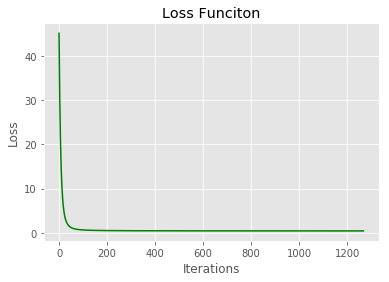

In [151]:
plt.plot(losses_3, 'g')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Loss Funciton')
plt.show()

In [133]:
# Gradient Descent - polynomial of degree 4

alpha =0.005
itns = 1000
counter = 0
losses_4 = []
stop_criterion = True
w = np.array([0,1,1,1,1,1,1,1,1,1,1,1,1,1,1])
print(w)
while(stop_criterion):
    y_hat = w.dot(X_train_4.T)
    loss_ = lossfunc(X_train_4,w,y_train)
    losses_4.append(loss_)
    if counter%20 == 0:
        print("iteration: {} loss : {}" .format(counter,loss_))
    w_der = (y_hat-y_train)*(X_train_4.T)
    w_der_norm = np.mean(w_der, axis = 1)
    w = w - alpha*w_der_norm
    if(counter > 100):
        if (abs((losses_4[counter] - losses_4[counter-1])/losses_4[counter]) < 0.00002):
            stop_criterion = False
    counter = counter+1
    
print(w)

[0 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
iteration: 0 loss : 201.11239176671643
iteration: 20 loss : 3.455409420223347
iteration: 40 loss : 1.2467502548545173
iteration: 60 loss : 0.8086035807545191
iteration: 80 loss : 0.6832907402835233
iteration: 100 loss : 0.6271324751523629
iteration: 120 loss : 0.5923855945883839
iteration: 140 loss : 0.5674865781950919
iteration: 160 loss : 0.5484248621568195
iteration: 180 loss : 0.5332542580886112
iteration: 200 loss : 0.5208384599521977
iteration: 220 loss : 0.5104558530154997
iteration: 240 loss : 0.5016257952489939
iteration: 260 loss : 0.4940157065891985
iteration: 280 loss : 0.48738711632169435
iteration: 300 loss : 0.4815632114652457
iteration: 320 loss : 0.4764088801201792
iteration: 340 loss : 0.47181817362501194
iteration: 360 loss : 0.4677062344254138
iteration: 380 loss : 0.46400394942688494
iteration: 400 loss : 0.46065429487912446
iteration: 420 loss : 0.45760975327506337
iteration: 440 loss : 0.4548304271110351
iteration: 460 loss : 0.452

In [134]:
RSq_RMS(w,X_test_4,y_test)

[0.18600975545176979, 0.90473439098708142]

In [135]:
# Gradient Descent for testing

loss_gd_test = lossfunc(X_test_4, w, y_test)
print(loss_gd_test)

0.409272159117


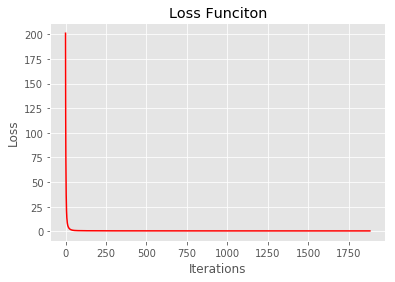

In [150]:
plt.plot(losses_4, 'r')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Loss Funciton')
plt.show()

In [142]:
# Gradient Descent - polynomial of degree 5

alpha =0.005
itns = 1000
counter = 0
losses_5 = []
stop_criterion = True
w = np.array([0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1])
print(w)
while(stop_criterion):
    y_hat = w.dot(X_train_5.T)
    loss_ = lossfunc(X_train_5,w,y_train)
    losses_5.append(loss_)
    if counter%20 == 0:
        print("iteration: {} loss : {}" .format(counter,loss_))
    w_der = (y_hat-y_train)*(X_train_5.T)
    w_der_norm = np.mean(w_der, axis = 1)
    w = w - alpha*w_der_norm
    if(counter > 100):
        if (abs((losses_5[counter] - losses_5[counter-1])/losses_5[counter]) < 0.00002):
            stop_criterion = False
    counter = counter+1
    
print(w)

[0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
iteration: 0 loss : 934.3557487424149
iteration: 20 loss : 3.8303640831444468
iteration: 40 loss : 2.65760167942102
iteration: 60 loss : 2.026595242812893
iteration: 80 loss : 1.5992509341530368
iteration: 100 loss : 1.29265057865178
iteration: 120 loss : 1.0691340456659622
iteration: 140 loss : 0.9053039438169879
iteration: 160 loss : 0.7848569206728668
iteration: 180 loss : 0.6960589325031242
iteration: 200 loss : 0.6303898607004342
iteration: 220 loss : 0.581645881047922
iteration: 240 loss : 0.5453037880199528
iteration: 260 loss : 0.5180625093331962
iteration: 280 loss : 0.4975107011617057
iteration: 300 loss : 0.48188530326247253
iteration: 320 loss : 0.4698959836519227
iteration: 340 loss : 0.46059738880783263
iteration: 360 loss : 0.45329611236075784
iteration: 380 loss : 0.4474828979787058
iteration: 400 loss : 0.44278319659818494
iteration: 420 loss : 0.4389210833955218
iteration: 440 loss : 0.4356929058137342
iteration: 460 loss : 

In [143]:
RSq_RMS(w,X_test_5,y_test)

[0.25365117467964271, 0.86632814916169465]

In [144]:
# Gradient Descent for testing

loss_gd_test = lossfunc(X_test_5, w, y_test)
print(loss_gd_test)

0.375262231015


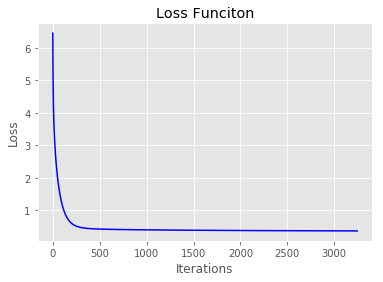

In [145]:
plt.plot(losses_5[10:], 'b')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Loss Funciton')
plt.show()

In [146]:
# Gradient Descent - polynomial of degree 6

alpha =0.001
itns = 10000
counter = 0
losses_6 = []
stop_criterion = True
w = np.array([0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1])
print(w)
while(stop_criterion):
#for i in range(itns):
    y_hat = w.dot(X_train_6.T)
    loss_ = lossfunc(X_train_6,w,y_train)
    losses_6.append(loss_)
    if counter%20 == 0:
        print("iteration: {} loss : {}" .format(counter,loss_))
    w_der = (y_hat-y_train)*(X_train_6.T)
    w_der_norm = np.mean(w_der, axis = 1)
    w = w - alpha*w_der_norm
    if(counter > 100):
        if (abs((losses_6[counter] - losses_6[counter-1])/losses_6[counter]) < 0.000008):
            stop_criterion = False
    counter = counter+1
    
print(w)

[0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
iteration: 0 loss : 4377.237650531316
iteration: 20 loss : 23.505118618002705
iteration: 40 loss : 16.131956520153068
iteration: 60 loss : 12.6613512977325
iteration: 80 loss : 10.461794420154728
iteration: 100 loss : 8.865125161685965
iteration: 120 loss : 7.609466068108443
iteration: 140 loss : 6.579032248929661
iteration: 160 loss : 5.715429566779505
iteration: 180 loss : 4.984262908341962
iteration: 200 loss : 4.362130574497502
iteration: 220 loss : 3.8313841871722594
iteration: 240 loss : 3.3778897051116186
iteration: 260 loss : 2.989970416436706
iteration: 280 loss : 2.657832587339132
iteration: 300 loss : 2.373201991215802
iteration: 320 loss : 2.1290633639788195
iteration: 340 loss : 1.9194580093597668
iteration: 360 loss : 1.7393194685704947
iteration: 380 loss : 1.5843370820504155
iteration: 400 loss : 1.4508414637402751
iteration: 420 loss : 1.3357078486048761
iteration: 440 loss : 1.2362742972262426
iteration: 460 lo

iteration: 3900 loss : 0.40587473263345114
iteration: 3920 loss : 0.40565116932236295
iteration: 3940 loss : 0.4054300358637339
iteration: 3960 loss : 0.40521128923864624
iteration: 3980 loss : 0.4049948872632601
iteration: 4000 loss : 0.40478078857152794
iteration: 4020 loss : 0.404568952598318
iteration: 4040 loss : 0.40435933956293335
iteration: 4060 loss : 0.40415191045301513
iteration: 4080 loss : 0.40394662700881906
iteration: 4100 loss : 0.40374345170785175
iteration: 4120 loss : 0.40354234774985903
iteration: 4140 loss : 0.40334327904215467
iteration: 4160 loss : 0.40314621018527985
iteration: 4180 loss : 0.40295110645898435
iteration: 4200 loss : 0.4027579338085193
iteration: 4220 loss : 0.4025666588312363
iteration: 4240 loss : 0.4023772487634793
iteration: 4260 loss : 0.4021896714677658
iteration: 4280 loss : 0.4020038954202476
iteration: 4300 loss : 0.4018198896984444
iteration: 4320 loss : 0.4016376239692423
iteration: 4340 loss : 0.40145706847715035
iteration: 4360 loss :

iteration: 7760 loss : 0.38263978563872164
iteration: 7780 loss : 0.3825627513979702
iteration: 7800 loss : 0.3824859031814261
iteration: 7820 loss : 0.3824092395883688
iteration: 7840 loss : 0.3823327592388267
iteration: 7860 loss : 0.38225646077320813
iteration: 7880 loss : 0.3821803428519374
iteration: 7900 loss : 0.3821044041550982
iteration: 7920 loss : 0.3820286433820841
iteration: 7940 loss : 0.38195305925125383
iteration: 7960 loss : 0.3818776504995962
iteration: 7980 loss : 0.3818024158823979
iteration: 8000 loss : 0.3817273541729197
iteration: 8020 loss : 0.3816524641620778
iteration: 8040 loss : 0.38157774465813193
iteration: 8060 loss : 0.3815031944863776
iteration: 8080 loss : 0.3814288124888461
iteration: 8100 loss : 0.38135459752400913
iteration: 8120 loss : 0.38128054846648873
iteration: 8140 loss : 0.38120666420677274
iteration: 8160 loss : 0.38113294365093614
iteration: 8180 loss : 0.38105938572036735
iteration: 8200 loss : 0.38098598935149836
iteration: 8220 loss : 0

In [153]:
RSq_RMS(w,X_test_6,y_test)

[0.24882747081683032, 0.86912320951657418]

In [161]:
# Gradient Descent for testing

loss_gd_test = lossfunc(X_test_6, w, y_test)
print(loss_gd_test)

0.37768757666


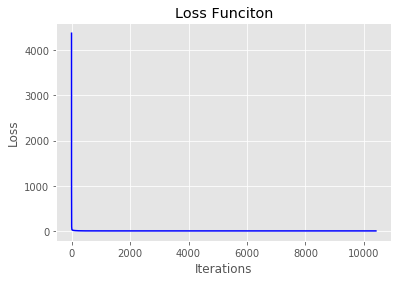

In [155]:
plt.plot(losses_6, 'b')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Loss Funciton')
plt.show()

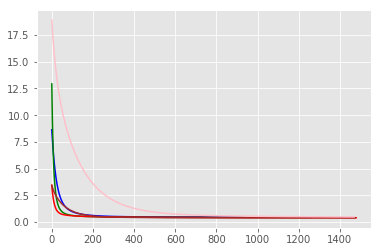

In [160]:
plt.plot(losses_2, 'b')
plt.plot(losses_3[10:], 'g')
plt.plot(losses_4[20:1500], 'r')
plt.plot(losses_5[25:1500], 'brown')
plt.plot(losses_6[30:1500], 'pink')

In [162]:
def  lossL1(x_,w_,y_,lambda_):
    m = len(y_)
    return (0.5/m)*np.sum((w_.dot(x_.T)-y_)**2)+(lambda_)*np.sum(np.abs(w_[1:]))

In [188]:
# Gradient Descent with L1 reg

alpha =0.001
itns = 1000
lambdas = [0.1,0.5,0.6,0.7,0.75]
losses_l1 = {}
losses_l1_val = {}
counter_l1 = []
w_storel1 = {}
for lambda_ in lambdas:
    losses_l1[lambda_] = []
    w = np.array([0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1])
    for i in range(itns):
        y_hat = w.dot(X_train_6.T)  
        if i%20 == 0:  
            loss_ = lossL1(X_train_6,w,y_train,lambda_)
            losses_l1[lambda_].append(loss_)
            print("lambda: {} iteration: {} loss : {}" .format(lambda_,i,loss_))   
            counter_l1.append(i)
        w_der = (y_hat-y_train)*(X_train_6.T)
        w_der_norm = np.mean(w_der, axis = 1) + lambda_*np.sign(w)
        w = w - alpha*w_der_norm
    w_storel1[lambda_] = w
    losses_l1_val[lambda_] = lossL1(X_val_6, w, y_val,lambda_)

lambda: 0.1 iteration: 0 loss : 4379.937650531316
lambda: 0.1 iteration: 20 loss : 24.916401934123797
lambda: 0.1 iteration: 40 loss : 17.34910516318064
lambda: 0.1 iteration: 60 loss : 13.720385714423433
lambda: 0.1 iteration: 80 loss : 11.388212502849889
lambda: 0.1 iteration: 100 loss : 9.678453745019642
lambda: 0.1 iteration: 120 loss : 8.325602132097291
lambda: 0.1 iteration: 140 loss : 7.211299008206683
lambda: 0.1 iteration: 160 loss : 6.275719667384598
lambda: 0.1 iteration: 180 loss : 5.486038668612812
lambda: 0.1 iteration: 200 loss : 4.812754280867303
lambda: 0.1 iteration: 220 loss : 4.241065105840109
lambda: 0.1 iteration: 240 loss : 3.753062327856249
lambda: 0.1 iteration: 260 loss : 3.3344807709338102
lambda: 0.1 iteration: 280 loss : 2.9750308389329647
lambda: 0.1 iteration: 300 loss : 2.666000721860378
lambda: 0.1 iteration: 320 loss : 2.399994913094893
lambda: 0.1 iteration: 340 loss : 2.170726693545138
lambda: 0.1 iteration: 360 loss : 1.9744487436002485
lambda: 0.1 

lambda: 0.7 iteration: 140 loss : 10.066243651963308
lambda: 0.7 iteration: 160 loss : 8.658714766614528
lambda: 0.7 iteration: 180 loss : 7.452612940068271
lambda: 0.7 iteration: 200 loss : 6.411780299525416
lambda: 0.7 iteration: 220 loss : 5.529247262142302
lambda: 0.7 iteration: 240 loss : 4.790810251892502
lambda: 0.7 iteration: 260 loss : 4.153755121145542
lambda: 0.7 iteration: 280 loss : 3.6074616270403723
lambda: 0.7 iteration: 300 loss : 3.161911263172596
lambda: 0.7 iteration: 320 loss : 2.8097439313718104
lambda: 0.7 iteration: 340 loss : 2.5073168785428566
lambda: 0.7 iteration: 360 loss : 2.2507540781731357
lambda: 0.7 iteration: 380 loss : 2.03417546508559
lambda: 0.7 iteration: 400 loss : 1.8371243219027658
lambda: 0.7 iteration: 420 loss : 1.6698800837592649
lambda: 0.7 iteration: 440 loss : 1.5250939157510748
lambda: 0.7 iteration: 460 loss : 1.3957687866947206
lambda: 0.7 iteration: 480 loss : 1.27136303817151
lambda: 0.7 iteration: 500 loss : 1.1549246157218584
lamb

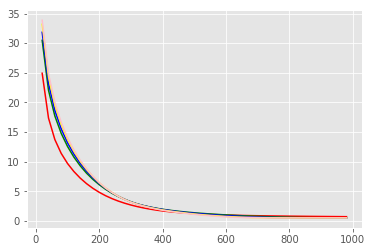

In [189]:
colors = np.array(['red','green','blue','yellow','pink'])
for i,lamb in enumerate(losses_l1.keys()):
    plt.plot(counter_l1[1:50],losses_l1[lamb][1:],color = colors[i])

0.688156775026
0.49461078519
0.484727474448
0.488007050407
0.489198317452


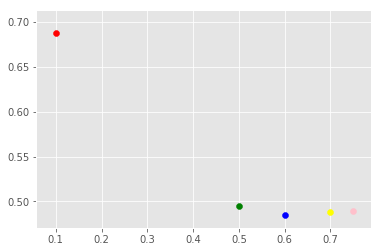

In [190]:
for i,lamb in enumerate(losses_l1_val.keys()):
    plt.scatter(lamb,losses_l1_val[lamb],color=colors[i])
    print(losses_l1_val[lamb])

In [192]:
RSq_RMS(w_storel1[0.6],X_test_6,y_test)

[0.048215799544164106, 0.97831957824430327]

In [194]:
# Gradient Descent with L1 reg for testing
loss_l1gd_test = lossL1(X_test_6, w_storel1[0.6], y_test, 0.6)
#print(w_storel1[0.6])
print(loss_l1gd_test)

0.492749499645


In [195]:
def  lossL2(x_,w_,y_,lambda_):
    m = len(y_)
    return (0.5/m)*np.sum((w_.dot(x_.T)-y_)**2)+0.5*lambda_*np.sum(w_**2)

In [198]:
# Gradient Descent with L2 reg

alpha =0.001
itns = 1000
lambdas = [0.5,1,2,4,5]
losses_l2 = {}
losses_l2_val = {}
counter_l2 = []
w_store = {}

for lambda_ in lambdas:
    losses_l2[lambda_] = []
    w = np.array([0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1])
    for i in range(itns):
        y_hat = w.dot(X_train_6.T)  
        if i%20 == 0:  
            loss_ = lossL2(X_train_6,w,y_train,lambda_)
            losses_l2[lambda_].append(loss_)
            counter_l2.append(i)
            print("lambda: {} iteration: {} loss : {}" .format(lambda_,i,loss_))
            
        w_der = (y_hat-y_train)*(X_train_6.T)
        w_der_norm = np.mean(w_der, axis = 1) + lambda_*w
        w = w - alpha*w_der_norm
    w_store[lambda_] = w
    losses_l2_val[lambda_] = lossL2(X_val_6, w, y_val,lambda_)

lambda: 0.5 iteration: 0 loss : 4383.987650531316
lambda: 0.5 iteration: 20 loss : 25.522481100754284
lambda: 0.5 iteration: 40 loss : 17.57915670235288
lambda: 0.5 iteration: 60 loss : 13.706470456106453
lambda: 0.5 iteration: 80 loss : 11.20439556288671
lambda: 0.5 iteration: 100 loss : 9.375761901613808
lambda: 0.5 iteration: 120 loss : 7.943251106993769
lambda: 0.5 iteration: 140 loss : 6.779980618914909
lambda: 0.5 iteration: 160 loss : 5.818503771436352
lambda: 0.5 iteration: 180 loss : 5.016897055929007
lambda: 0.5 iteration: 200 loss : 4.34557499887904
lambda: 0.5 iteration: 220 loss : 3.7818916145083694
lambda: 0.5 iteration: 240 loss : 3.307728532519114
lambda: 0.5 iteration: 260 loss : 2.908266607631933
lambda: 0.5 iteration: 280 loss : 2.571255864113665
lambda: 0.5 iteration: 300 loss : 2.2865180225401196
lambda: 0.5 iteration: 320 loss : 2.0455742354645827
lambda: 0.5 iteration: 340 loss : 1.841351263309712
lambda: 0.5 iteration: 360 loss : 1.6679431459590823
lambda: 0.5 i

lambda: 4 iteration: 220 loss : 2.0892948847321415
lambda: 4 iteration: 240 loss : 1.7053276192519538
lambda: 4 iteration: 260 loss : 1.416127725899058
lambda: 4 iteration: 280 loss : 1.1974610959155005
lambda: 4 iteration: 300 loss : 1.031455458097063
lambda: 4 iteration: 320 loss : 0.9048963091002458
lambda: 4 iteration: 340 loss : 0.8079877602451742
lambda: 4 iteration: 360 loss : 0.7334484817941624
lambda: 4 iteration: 380 loss : 0.6758506396823359
lambda: 4 iteration: 400 loss : 0.6311356198677653
lambda: 4 iteration: 420 loss : 0.5962586451694414
lambda: 4 iteration: 440 loss : 0.5689275173716088
lambda: 4 iteration: 460 loss : 0.5474101952546541
lambda: 4 iteration: 480 loss : 0.5303927863139422
lambda: 4 iteration: 500 loss : 0.5168745156108796
lambda: 4 iteration: 520 loss : 0.5060898599312253
lambda: 4 iteration: 540 loss : 0.49745067362002493
lambda: 4 iteration: 560 loss : 0.4905030545649197
lambda: 4 iteration: 580 loss : 0.4848951005856263
lambda: 4 iteration: 600 loss : 

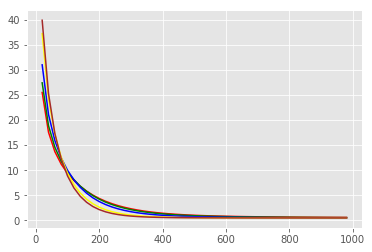

In [200]:
colors = np.array(['red','green','blue','yellow','brown','pink'])
for i,lamb in enumerate(losses_l2.keys()):
    plt.plot(counter_l2[1:50], losses_l2[lamb][1:],color = colors[i])

0.552764300405
0.513500390207
0.467613109979
0.456295538978
0.457103242733


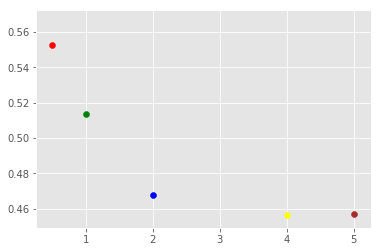

In [201]:
for i,lamb in enumerate(losses_l2_val.keys()):
    plt.scatter(lamb,losses_l2_val[lamb],color=colors[i])
    print(losses_l2_val[lamb])

In [203]:
print(RSq_RMS(w_store[4],X_test_6,y_test))

[0.091102721781383567, 0.95602423255776714]


In [205]:
# Gradient Descent with L2 reg for testing
loss_l2gd_test = lossL2(X_test_6, w_store[4], y_test, 4)
#print(w_store[4])
print(loss_l2gd_test)

0.46406128067
